### Stage I
#### Matrix Decomposition

In [10]:
# from mf.mf import godec
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import roc_curve, auc
import inspect

# plt.style.use('fivethirtyeight')
# Plot options
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 6
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True#默认为false，此处设置为TRUE
plt.rcParams['font.family'] = 'Times New Roman'

In [11]:
#load data
path = "E:\MY\paper\FDILocation\code\data\case14"
z_sum0 = scio.loadmat(path+"\\z_0.mat")['z'][:,:,0]
z_sum5 = scio.loadmat(path+"\\z_5.mat")['z'][:,:,0]
z_sum10 = scio.loadmat(path+"\\z_10.mat")['z'][:,:,0]

# detection
a_new_sin0_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_sin0-dec.mat")['A']
a_new_sin5_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_sin5-dec.mat")['A']
a_new_sin10_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_sin10-dec.mat")['A']
a_new_um0_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_um0-dec.mat")['A']
a_new_um5_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_um5-dec.mat")['A']
a_new_um10_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_um10-dec.mat")['A']
a_new_co0_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_co0-dec.mat")['A']
a_new_co5_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_co5-dec.mat")['A']
a_new_co10_sum_dec = scio.loadmat(path+"\\LRMF\\a_new_co10-dec.mat")['A']


# single-bus with 0% noise
za_sin0_sum = scio.loadmat(path+"\\single\\za_0.mat")['za'][:,:,0]
a_sin0_sum = scio.loadmat(path+"\\single\\a_0.mat")['a'][:,:,0]
a_new_sin0_sum = scio.loadmat(path+"\\LRMF\\a_new_sin0.mat")['A']
c_sin0_true_sum = scio.loadmat(path+"\\single\\c_0.mat")['c'][:,:,0]

# single-bus with 5% noise
za_sin5_sum = scio.loadmat(path+"\\single\\za_5.mat")['za'][:,:,0]
a_sin5_sum = scio.loadmat(path+"\\single\\a_5.mat")['a'][:,:,0]
a_new_sin5_sum = scio.loadmat(path+"\\LRMF\\a_new_sin5.mat")['A']
c_sin5_true_sum = scio.loadmat(path+"\\single\\c_5.mat")['c'][:,:,0]

# single-bus with 10% noise
za_sin10_sum = scio.loadmat(path+"\\single\\za_10.mat")['za'][:,:,0]
a_sin10_sum = scio.loadmat(path+"\\single\\a_10.mat")['a'][:,:,0]
a_new_sin10_sum = scio.loadmat(path+"\\LRMF\\a_new_sin10.mat")['A']
c_sin10_true_sum = scio.loadmat(path+"\\single\\c_10.mat")['c'][:,:,0]


# uncoordinate multiple-bus with 0% noise
za_um0_sum = scio.loadmat(path+"\\unmul\\za_0.mat")['za'][:,:,0]
a_um0_sum = scio.loadmat(path+"\\unmul\\a_0.mat")['a'][:,:,0]
a_new_um0_sum = scio.loadmat(path+"\\LRMF\\a_new_um0.mat")['A']
c_um0_true_sum = scio.loadmat(path+"\\unmul\\c_0.mat")['c'][:,:,0]

# uncoordinate multiple-bus with 5% noise
za_um5_sum = scio.loadmat(path+"\\unmul\\za_5.mat")['za'][:,:,0]
a_um5_sum = scio.loadmat(path+"\\unmul\\a_5.mat")['a'][:,:,0]
a_new_um5_sum = scio.loadmat(path+"\\LRMF\\a_new_um5.mat")['A']
c_um5_true_sum = scio.loadmat(path+"\\unmul\\c_5.mat")['c'][:,:,0]

# uncoordinate multiple-bus with 10% noise
za_um10_sum = scio.loadmat(path+"\\unmul\\za_10.mat")['za'][:,:,0]
a_um10_sum = scio.loadmat(path+"\\unmul\\a_10.mat")['a'][:,:,0]
a_new_um10_sum = scio.loadmat(path+"\\LRMF\\a_new_um10.mat")['A']
c_um10_true_sum = scio.loadmat(path+"\\unmul\\c_10.mat")['c'][:,:,0]

# coordinate multiple-bus with 0% noise
za_co0_sum = scio.loadmat(path+"\\comul\\za_0.mat")['za'][:,:,0]
a_co0_sum = scio.loadmat(path+"\\comul\\a_0.mat")['a'][:,:,0]
a_new_co0_sum = scio.loadmat(path+"\\LRMF\\a_new_co0.mat")['A']
c_co0_true_sum = scio.loadmat(path+"\\comul\\c_0.mat")['c'][:,:,0]

# coordinate multiple-bus with 5% noise
za_co5_sum = scio.loadmat(path+"\\comul\\za_5.mat")['za'][:,:,0]
a_co5_sum = scio.loadmat(path+"\\comul\\a_5.mat")['a'][:,:,0]
a_new_co5_sum = scio.loadmat(path+"\\LRMF\\a_new_co5.mat")['A']
c_co5_true_sum = scio.loadmat(path+"\\comul\\c_5.mat")['c'][:,:,0]

# coordinate multiple-bus with 0% noise
za_co10_sum = scio.loadmat(path+"\\comul\\za_10.mat")['za'][:,:,0]
a_co10_sum = scio.loadmat(path+"\\comul\\a_10.mat")['a'][:,:,0]
a_new_co10_sum = scio.loadmat(path+"\\LRMF\\a_new_co10.mat")['A']
c_co10_true_sum = scio.loadmat(path+"\\comul\\c_10.mat")['c'][:,:,0]

H = scio.loadmat(path+"\\H.mat")['h']
Wr_5 = scio.loadmat(path+"\\W-5.mat")['w']
Wr_5 = scio.loadmat(path+"\\W-5.mat")['w']
Wr_10 = scio.loadmat(path+"\\W-10.mat")['w']

# config
att_times = 100

In [12]:
def mean_absolute_error(new, true):
    mae_sum = []
    for i in range(new.shape[0]):
        e = new[i,:] - true[i,:]
        mae = np.linalg.norm(e, ord = 1)/new.shape[1]
        mae_sum.append(mae)
    return mae_sum

def absolute_error(new, true):
    aError = new - true
    # print(aError.shape)
    # Mean of 100 sets of data
    aError_mean = np.mean(aError,0)
    return aError_mean

def estimate_c(H, A_new, times):
    P_inv = np.linalg.inv(H.T@H)
    c_new = []
    for i in range(times):
        c_est = P_inv@H.T@A_new[i,:].T
        c_new.append(c_est)
    c_new = np.array(c_new)
    return c_new

def a_decect(a,times):
    no_mea = a.shape[1]
    a_true_sum = np.zeros((times,no_mea))
    for i in range(times):
        if i%2 == 0:
            a_true_sum[i, :] = a[i,:]
    return a_true_sum

def detection_label(H, a):
    Hmax = copy.deepcopy(H)
    Hmax = abs(Hmax)
    Hmax[Hmax == 0] = np.amax(Hmax) + 1
    ep = np.min(Hmax)
    y_pred = []
    for v in a:
        if np.max(abs(v))>ep:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


Numerical detection accuracy: mean absolute error of the
detected attack matrix

In [14]:
a_mae_sin0 = mean_absolute_error(a_new_sin0_sum, a_sin0_sum)
a_mae_sin5 = mean_absolute_error(a_new_sin5_sum, a_sin5_sum)
a_mae_sin10 = mean_absolute_error(a_new_sin10_sum, a_sin10_sum)

a_mae_um0 = mean_absolute_error(a_new_um0_sum, a_um0_sum)
a_mae_um5 = mean_absolute_error(a_new_um5_sum, a_um5_sum)
a_mae_um10 = mean_absolute_error(a_new_um10_sum, a_um10_sum)

a_mae_co0 = mean_absolute_error(a_new_co0_sum, a_co0_sum)
a_mae_co5 = mean_absolute_error(a_new_co5_sum, a_co5_sum)
a_mae_co10 = mean_absolute_error(a_new_co10_sum, a_co10_sum)

- Estimate injected error vector

In [16]:
c_new_sin0_sum = estimate_c(H, a_new_sin0_sum, att_times)
c_mae_sin0 = mean_absolute_error(c_new_sin0_sum, c_sin0_true_sum)

c_new_sin5_sum = estimate_c(H, a_new_sin5_sum, att_times)
c_mae_sin5 = mean_absolute_error(c_new_sin5_sum, c_sin5_true_sum)

c_new_sin10_sum = estimate_c(H, a_new_sin10_sum, att_times)
c_mae_sin10 = mean_absolute_error(c_new_sin10_sum, c_sin10_true_sum)

c_new_um0_sum = estimate_c(H, a_new_um0_sum, att_times)
c_mae_um0 = mean_absolute_error(c_new_um0_sum, c_um0_true_sum)

c_new_um5_sum = estimate_c(H, a_new_um5_sum, att_times)
c_mae_um5 = mean_absolute_error(c_new_um5_sum, c_um5_true_sum)

c_new_um10_sum = estimate_c(H, a_new_um10_sum, att_times)
c_mae_um10 = mean_absolute_error(c_new_um10_sum, c_um10_true_sum)

c_new_co0_sum = estimate_c(H, a_new_co0_sum, att_times)
c_mae_co0 = mean_absolute_error(c_new_co0_sum, c_co0_true_sum)

c_new_co5_sum = estimate_c(H, a_new_co5_sum, att_times)
c_mae_co5 = mean_absolute_error(c_new_co5_sum, c_co5_true_sum)

c_new_co10_sum = estimate_c(H, a_new_co10_sum, att_times)
c_mae_co10 = mean_absolute_error(c_new_co10_sum, c_co10_true_sum)

attack_type_list = [c_new_sin0_sum, c_new_sin5_sum, c_new_sin10_sum,c_new_um0_sum,
                    c_new_um5_sum,c_new_um10_sum,c_new_co0_sum,c_new_co5_sum,c_new_co10_sum]

for i in attack_type_list:
    name = retrieve_name(i)[0]
    # print(name)
    dir = f"E:\MY\paper\FDILocation\code\data\case14\c_new\{name}.mat"
    scio.savemat(dir, {'cnew': i})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


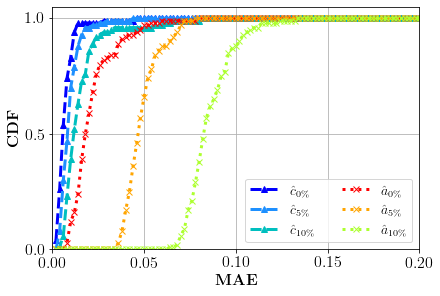

In [45]:

plt.figure(figsize=(6, 4))

hist_sin0, bin_sin0, _ = plt.hist(c_mae_sin0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_sin5, bin_sin5, _ = plt.hist(c_mae_sin5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_sin10, bin_sin10, _ = plt.hist(c_mae_sin10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

hista_sin0, bina_sin0, _ = plt.hist(a_mae_sin0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_sin5, bina_sin5, _ = plt.hist(a_mae_sin5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_sin10, bina_sin10, _ = plt.hist(a_mae_sin10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

l_sin0, = plt.plot(bin_sin0[1:],hist_sin0 ,linestyle='--', marker='^', color='b', linewidth=3)
l_sin5, = plt.plot(bin_sin5[1:],hist_sin5 ,linestyle='--',marker='^' ,color='dodgerblue', linewidth=3)
l_sin10, = plt.plot(bin_sin10[1:],hist_sin10 ,linestyle='--', marker='^', color='c', linewidth=3)

la_sin0, = plt.plot(bina_sin0[1:],hista_sin0 ,linestyle=':', marker='x',color='r', linewidth=3)
la_sin5, = plt.plot(bina_sin5[1:],hista_sin5 ,linestyle=':',marker='x',color='orange', linewidth=3)
la_sin10, = plt.plot(bina_sin10[1:],hista_sin10 ,linestyle=':',marker='x',color='greenyellow', linewidth=3)

plt.grid()
ax = plt.gca()
ylabel = np.linspace(0, 1.00, 3)
xlabel = np.linspace(0, 0.2, 5)
plt.yticks(ylabel)
# ax.set_yticklabels(ylabel)

plt.xticks(xlabel)
# ax.set_yticklabels(xlabel)

# The maximum and minimum values of the y-axis and the x-axis
plt.xlim(0,0.2)
# plt.xlim(-10,10)
plt.ylim(0,1.05)

# Axis name
plt.ylabel(r'\textbf{CDF}')
plt.xlabel(r'\textbf{MAE}')

# plt.legend(handles=[l_godec, l_LRMF, l_omogmf],labels=['GoDec-basd method', 'LRMF-basd method', 'DaSDeL'],loc='best',handlelength=2.5, prop = {"family":"Times New Roman", "size":12})
plt.legend(handles=[l_sin0,l_sin5,l_sin10,la_sin0,la_sin5,la_sin10],ncol = 2,labels=[r'$\hat{c}_{0\%}$',r'$\hat{c}_{5\%}$',r'$\hat{c}_{10\%}$', 
                                                   r'$\hat{a}_{0\%}$',r'$\hat{a}_{5\%}$',r'$\hat{a}_{10\%}$'])
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\ac-cdf-sin.eps", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


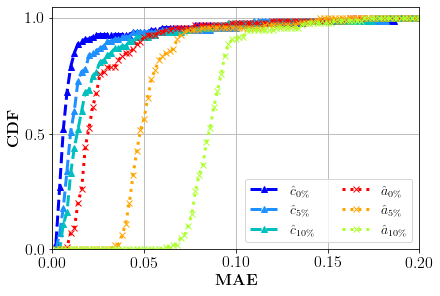

In [46]:
plt.figure(figsize=(6, 4))
hist_um0, bin_um0, _ = plt.hist(c_mae_um0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_um5, bin_um5, _ = plt.hist(c_mae_um5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_um10, bin_um10, _ = plt.hist(c_mae_um10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

hista_um0, bina_um0, _ = plt.hist(a_mae_um0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_um5, bina_um5, _ = plt.hist(a_mae_um5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_um10, bina_um10, _ = plt.hist(a_mae_um10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

l_um0, = plt.plot(bin_um0[1:],hist_um0 ,linestyle='--', marker='^',color='b', linewidth=3)
l_um5, = plt.plot(bin_um5[1:],hist_um5 ,linestyle='--', marker='^',color='dodgerblue', linewidth=3)
l_um10, = plt.plot(bin_um10[1:],hist_um10 ,linestyle='--', marker='^',color='c', linewidth=3)

la_um0, = plt.plot(bina_um0[1:],hista_um0 ,linestyle=':', marker='x',color='r', linewidth=3)
la_um5, = plt.plot(bina_um5[1:],hista_um5 ,linestyle=':',marker='x',color='orange', linewidth=3)
la_um10, = plt.plot(bina_um10[1:],hista_um10 ,linestyle=':',marker='x',color='greenyellow', linewidth=3)

plt.grid()
ax = plt.gca()
ylabel = np.linspace(0, 1, 3)
# xlabel = np.linspace(-0.1,0.1, 3)
plt.yticks(ylabel)
ax.set_yticklabels(ylabel)

# The maximum and minimum values of the y-axis and the x-axis
plt.xlim(0,0.2)
# plt.xlim(-10,10)
plt.ylim(0,1.05)

# Axis name
plt.ylabel(r'\textbf{CDF}')
plt.xlabel(r'\textbf{MAE}')

# plt.legend(handles=[l_godec, l_LRMF, l_omogmf],labels=['GoDec-basd method', 'LRMF-basd method', 'DaSDeL'],loc='best',handlelength=2.5, prop = {"family":"Times New Roman", "size":12})
plt.legend(handles=[l_sin0,l_sin5,l_sin10,la_sin0,la_sin5,la_sin10],ncol = 2,labels=[r'$\hat{c}_{0\%}$',r'$\hat{c}_{5\%}$',r'$\hat{c}_{10\%}$', 
                                                   r'$\hat{a}_{0\%}$',r'$\hat{a}_{5\%}$',r'$\hat{a}_{10\%}$'])
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\ac-cdf-um.eps", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


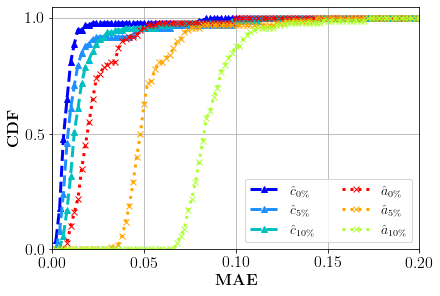

In [47]:


plt.figure(figsize=(6, 4))

hist_co0, bin_co0, _ = plt.hist(c_mae_co0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_co5, bin_co5, _ = plt.hist(c_mae_co5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hist_co10, bin_co10, _ = plt.hist(c_mae_co10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

hista_co0, bina_co0, _ = plt.hist(a_mae_co0, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_co5, bina_co5, _ = plt.hist(a_mae_co5, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)
hista_co10, bina_co10, _ = plt.hist(a_mae_co10, bins=100, range=[0,0.2], density=True, cumulative=True, alpha=0)

l_co0, = plt.plot(bin_co0[1:],hist_co0 ,linestyle='--', marker='^',color='b', linewidth=3)
l_co5, = plt.plot(bin_co5[1:],hist_co5 ,linestyle='--', marker='^',color='dodgerblue', linewidth=3)
l_co10, = plt.plot(bin_co10[1:],hist_co10 ,linestyle='--', marker='^',color='c', linewidth=3)

la_co0, = plt.plot(bin_co0[1:],hista_co0 ,linestyle=':', marker='x',color='r', linewidth=3)
la_co5, = plt.plot(bin_co5[1:],hista_co5 ,linestyle=':',marker='x',color='orange', linewidth=3)
la_co10, = plt.plot(bin_co10[1:],hista_co10 ,linestyle=':',marker='x',color='greenyellow', linewidth=3)

plt.grid()
ax = plt.gca()
ylabel = np.linspace(0, 1, 3)
# xlabel = np.linspace(-0.1,0.1, 3)
plt.yticks(ylabel)
# ax.set_yticklabels(ylabel)

# The maximum and minimum values of the y-axis and the x-axis
plt.xlim(0,0.2)
# plt.xlim(-10,10)
plt.ylim(0,1.05)

# Axis name
plt.ylabel(r'\textbf{CDF}')
plt.xlabel(r'\textbf{MAE}')

# plt.legend(handles=[l_godec, l_LRMF, l_omogmf],labels=['GoDec-basd method', 'LRMF-basd method', 'DaSDeL'],loc='best',handlelength=2.5, prop = {"family":"Times New Roman", "size":12})
plt.legend(handles=[l_sin0,l_sin5,l_sin10,la_sin0,la_sin5,la_sin10],ncol = 2,labels=[r'$\hat{c}_{0\%}$',r'$\hat{c}_{5\%}$',r'$\hat{c}_{10\%}$', 
                                                   r'$\hat{a}_{0\%}$',r'$\hat{a}_{5\%}$',r'$\hat{a}_{10\%}$'])
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\ac-cdf-co.eps", dpi=600)

### Stage II
#### Perturbation Strategy

In [8]:
from powercase14 import power_env
from config_mea_idx import define_mea_idx_noise
from pypower.api import case14
from pypower.idx_bus import PD, QD
from pypower.idx_brch import RATE_A, BR_X
from gen_data import gen_case, gen_load
from MTD import mtd
from sklearn import metrics

In [9]:
# Instance power env
case_name = 'case14'
case = case14()
case = gen_case(case, 'case14')
mea_idx, no_mea, noise_sigma = define_mea_idx_noise(case, 'FULL')
_, _ = gen_load(case, 'case14')
case_env = power_env(case = case, case_name = case_name, noise_sigma = noise_sigma, idx = mea_idx, fpr = 0.05)

Load file found, loading the data...
Run on the default load condition.
Initial OPF tests ok.
************************************************************


In [10]:
def c_bool(c):
    """
    The re-estimated injection phase angle c from decomposition：
    Convert the bus that are attacked to 1, the bus that are not attacked to 0
    """
    c_cvt = np.zeros((c.shape[0],c.shape[1] ))
    for i in range(c.shape[0]):
        # c[i] = [abs(j) for j in c[i]]
        c_attacked = []
        for j in c[i]:
            if abs(j) >= 0.1:
                c_attacked.append(1)
            else:
                c_attacked.append(0)
        c_cvt[i] = c_attacked
    return c_cvt

def fpr_tpr(y_true, y_pred):
    [m,n] = y_true.shape
    y_true = y_true.reshape(m*n, 1)
    y_pred = y_pred.reshape(m*n, 1)

    tn, fp, fn, tp, = metrics.confusion_matrix(y_true, y_pred).ravel()

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)

    return fpr,tpr

In [11]:
pb = mtd(case_env=case_env)

c_sure_sin0_sum,_ = pb.att_verify_loop(c_sin0_true_sum,c_new_sin0_sum,att_times)

In [12]:
c_sure_sin0_bool = c_bool(c_sure_sin0_sum)
c_new_sin0_bool = c_bool(c_new_sin0_sum)
c_sin0_true_bool = c_bool(c_sin0_true_sum)
sin0_fp_mtd, sin0_tp_mtd = fpr_tpr(c_sin0_true_bool, c_sure_sin0_bool)
sin0_fp, sin0_tp = fpr_tpr(c_sin0_true_bool, c_new_sin0_bool)
print(f'tp/fp of dual stage scheme:{sin0_tp_mtd}/{sin0_fp_mtd}')
print(f'tp/fp of mf only:{sin0_tp}/{sin0_fp}')

tp/fp of dual stage scheme:0.91/0.0033333333333333335
tp/fp of mf only:1.0/0.0


In [13]:
# scio.savemat(f"E:\MY\paper\FDILocation\code\data\case14\single\c_new-0-sum.mat", {'c_new': c_new_sin0_sum})

In [14]:
# Z_r = np.vstack((z_sum5[0:10,:],za_sin5_sum[0:5,:], z_sum5[0:10,:]))
# r_plot = []
# for i in range(Z_r.shape[0]):
#     z =np.expand_dims(z_sum5[i], axis = 1)
#     x_est, z_est, r = case_env.dc_se(z)
#     r_plot.append(r)
# r_plot

In [15]:
case_name_test = 'case14'
case_test = case14()
case_test = gen_case(case_test, 'case14')  # Modify the case
mea_idx_test, no_mea_test, noise_sigma_test = define_mea_idx_noise(case_test, 'FULL')
_, _ = gen_load(case_test, 'case14')
case_env_test = power_env(case = case_test, case_name = case_name_test, noise_sigma = noise_sigma_test, idx = mea_idx_test, fpr = 0.05)

Load file found, loading the data...
Run on the default load condition.
Initial OPF tests ok.
************************************************************


In [128]:
def dcse_normal(case_env, times, noise_flag):
    # z_sum = []
    r_sum = []

    for i in range(times):
        result = case_env.run_opf(opf_idx = i)
        # print(f'Is {i}th OPF success: {result["success"]}')
        z, z_noise = case_env.construct_mea(result) # Get the measurement 
        if noise_flag > 0:
            z_mea = z_noise
        else:
            z_mea = z
        x_est, z_est, r = case_env.dc_se(z_mea)
        # z_sum.append(z_mea)
        r_sum.append(r)
    return r_sum


def dcse_attack(case_env, times, noise_flag, att_type):
    r_sum = []

    result = case_env.run_opf()
    # print(f'Is OPF success: {result["success"]}')
    z, z_noise = case_env.construct_mea(result) # Get the measurement
    if noise_flag > 0:
        z_mea = z_noise
    else:
        z_mea = z
    
    if att_type == 'single':#single-bus
        za_fdi,a,c = case_env.gen_sin_fdi(z_mea)
    elif att_type == 'unmul': #uncoordiante multiple-bus
        za_fdi,a,c = case_env.gen_mul_fdi(z_mea)
    elif att_type == 'comul': #coordiante multiple-bus
        za_fdi,a,c = case_env.gen_co_fdi(z_mea)

    
    for i in range(times):
        result = case_env.run_opf(opf_idx = i+5)
        # print(f'Is OPF success: {result["success"]}')
        z, z_noise = case_env.construct_mea(result) # Get the measurement
        if noise_flag > 0:
            z_mea = z_noise
        else:
            z_mea = z
        
        a = case_env.H@c
        za_fdi = np.add(z_noise,a.reshape(53,1))
       
        x_est, z_est, r = case_env.dc_se(za_fdi)
        # za_sum.append(za_fdi)
        r_sum.append(r)
    return r_sum, c

def perturb_strategy(self, c):
    att_bus = []
    for i in range(len(c)):
        if c[i] != 0:
            # att_bus.append(i)
            att_bus.append(self.env.non_ref_index[i])


    brh = [i for i in range(self.env.no_brh)]
    pertub_brh = []
    flag = 0

    for i in range(self.env.no_brh):
        if self.env.f_bus[i] in att_bus and self.env.t_bus[i] in att_bus:
            brh.pop(flag)
        elif self.env.f_bus[i] == self.env.ref_index or self.env.t_bus[i] == self.env.ref_index:
            brh.pop(flag)
        else:
            flag = flag + 1
    # print(brh)
    for i in brh:
        if self.env.f_bus[i] in att_bus:
            if c[self.env.non_ref_index.index(self.env.f_bus[i])] !=2:
                pertub_brh.append(i)
            att_bus.remove(self.env.f_bus[i])
        elif self.env.t_bus[i] in att_bus:
            if c[self.env.non_ref_index.index(self.env.t_bus[i])] !=2:
                pertub_brh.append(i)
            att_bus.remove(self.env.t_bus[i])
    return pertub_brh
    
def dcse_mtd(case_env, times, c):
    # z_sum = []
    r_sum = []

    for i in range(times):
        # pos = np.argmax(c)
        # attack_bus = case_env.non_ref_index[pos]
        brh = perturb_strategy(c)
        # for i in range(case_env.no_brh): # Find the branch connected to the attacked bus
        #     f = case_env.f_bus[i]
        #     t = case_env.t_bus[i]
        #     if f==attack_bus or t==attack_bus:
        #         brh = i
        #         break
        se, r_mtd,_ = case_env.se_mtd(c,brh)

        r = r_mtd/2
        print(r)
        # if r<200:
        #     r_sum.append(r)
        # else:
        #     r_sum.append(r)
        r_sum.append(r)
        # se, r_mtd = case_env.se_mtd(c,4)
    return r_sum

In [153]:
noise_flag = 5
att_type = 'single'
att_times = 5

R2 = []
r_normal = dcse_normal(case_env_test, 20, noise_flag)
R2.extend(r_normal)
r_fdi, c_fdi= dcse_attack(case_env, 1, noise_flag, att_type)
R2.extend(r_fdi)
r_mtd = dcse_mtd(case_env, 4, c_fdi)
R2.extend(r_mtd)
r_normal2 = dcse_normal(case_env_test, 10, noise_flag)
R2.extend(r_normal2)

Run on the default load condition.
92.94400872591522
176.53434620144017
196.7909293964667
119.8053560321087


In [136]:
R2 = []
r_normal = dcse_normal(case_env_test, 20, noise_flag)
R2.extend(r_normal)
r_fdi, c_fdi= dcse_attack(case_env, 1, noise_flag, att_type)
R2.extend(r_fdi)
r_mtd = dcse_mtd(case_env, 4, c_fdi)
R2.extend(r_mtd)
r_normal2 = dcse_normal(case_env_test, 10, noise_flag)
R2.extend(r_normal2)

Run on the default load condition.
21.918456555536885
29.060026177569505
25.278973513686232
29.740378984927943


In [ ]:

R3 = []
r_normal = dcse_normal(case_env_test, 20, noise_flag)
R3.extend(r_normal)
r_fdi, c_fdi= dcse_attack(case_env, 1, noise_flag, att_type)
R3.extend(r_fdi)
r_mtd = dcse_mtd(case_env, 4, c_fdi)
R3.extend(r_mtd)
r_normal2 = dcse_normal(case_env_test, 10, noise_flag)
R3.extend(r_normal2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


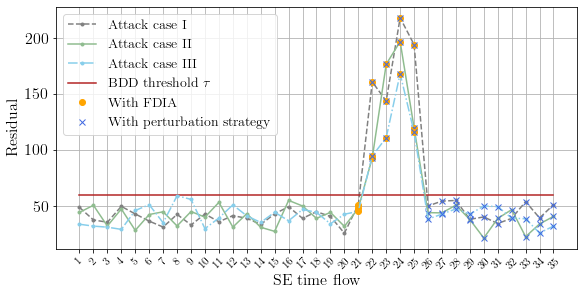

In [173]:
# R = np.array(R).reshape([20,1]) 
# print(R1)
x1=np.arange(1,36)
x2=np.arange(21,26)
x3 = np.arange(22,36)
tau = [case_env_test.bdd_threshold+4]*35

plt.figure(figsize=(8, 4))
l1, =plt.plot(x1,R1,'--', color='grey', marker='.')
l2, =plt.plot(x1,tau,'-', color='firebrick')
l3, =plt.plot(x2,R1[20:25],'o', color='orange')
l4, =plt.plot(x3,R1[21:35],'x', color='royalblue')

l5, =plt.plot(x1,R2,'-', color='darkseagreen', marker='.')
# l6, =plt.plot(x1,tau,'r-',label='type1')
l7, =plt.plot(x2,R2[20:25],'o', color='orange')
l8, =plt.plot(x3,R2[21:35],'x', color='royalblue')

l9, =plt.plot(x1,R3,'-.', color='skyblue', marker='.')
# l10, =plt.plot(x1,tau,'r-',label='type1')
l11, =plt.plot(x2,R3[20:25],'o', color='orange')
l12, =plt.plot(x3,R3[21:35],'x', color='royalblue')

# plt.title('The Lasers in Three Conditions')
plt.xlabel('SE time flow')
plt.ylabel('Residual')

plt.grid()


xt = [0,21,22,26,30]
# xlabel = np.linspace(-0.1,0.1, 3)
plt.xticks(x1,rotation=45,fontsize=11)
plt.legend(handles=[l1,l5,l9,l2,l3,l4],labels=['Attack case I','Attack case II','Attack case III',r'BDD threshold $\tau$','With FDIA','With perturbation strategy'],
           loc ='upper left')

# ax.set_xticklabels(x)
# plt.show()
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\residual.eps", dpi=600)